Dataset Loaded Successfully!

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Running PSO optimization...
Iteration 1/50 | Best Score: 79825.03
Iteration 11/50 | Best Score: 76120.87
Iteration 21/50 | Best Score: 75965.28
Iteration 31/50 | Best Score: 75953.29
Iteration 41/50 | Best Score: 75950.16
Iteration 50/50 | Best Score: 75949.25

Optimization complete! Visualizing results...


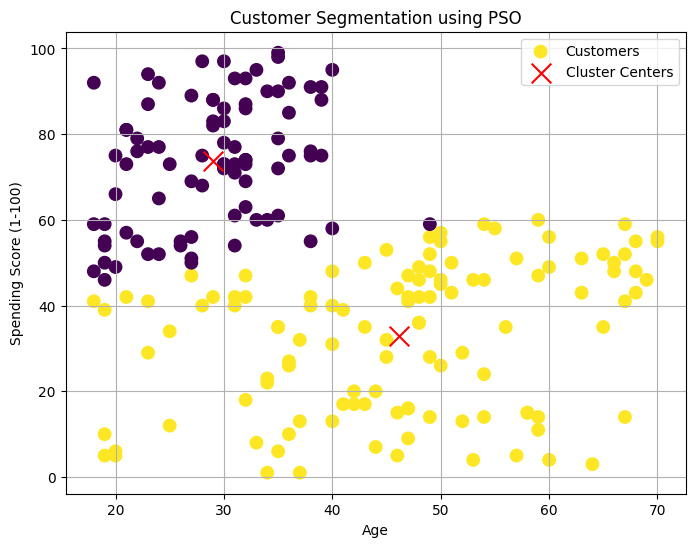

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ============================================
# Step 1: Load Dataset
# ============================================
df = pd.read_csv("/content/SCOA_A7.csv")  # Replace with your CSV path
print("Dataset Loaded Successfully!\n")
print(df.head())

# Encode Genre
df['Genre'] = df['Genre'].map({'Male': 0, 'Female': 1})

# Use Age and Spending Score
data = df[['Age', 'Spending Score (1-100)']].values.astype(float)  # <-- force float

# ============================================
# Step 2: PSO Parameters
# ============================================
num_clusters = 2
num_particles = 10
num_iterations = 50

w = 0.5
c1 = 1.5
c2 = 1.5

# ============================================
# Step 3: Define the Particle Class
# ============================================
class Particle:
    def __init__(self, data, num_clusters):
        self.data = data
        self.num_clusters = num_clusters
        # Randomly initialize cluster centroids as floats
        self.position = data[np.random.choice(range(len(data)), num_clusters)].astype(float)
        self.velocity = np.zeros_like(self.position, dtype=float)
        self.best_position = np.copy(self.position)
        self.best_score = self.evaluate()

    def evaluate(self):
        distances = np.linalg.norm(self.data[:, None] - self.position[None, :], axis=2)
        closest = np.argmin(distances, axis=1)
        score = sum(np.linalg.norm(self.data[i] - self.position[closest[i]]) ** 2 for i in range(len(self.data)))
        return score

    def update(self, global_best):
        r1, r2 = np.random.rand(), np.random.rand()
        cognitive = c1 * r1 * (self.best_position - self.position)
        social = c2 * r2 * (global_best - self.position)
        self.velocity = w * self.velocity + cognitive + social
        self.position = self.position + self.velocity  # <-- works fine with float
        score = self.evaluate()
        if score < self.best_score:
            self.best_score = score
            self.best_position = np.copy(self.position)

# ============================================
# Step 4: Initialize Swarm
# ============================================
swarm = [Particle(data, num_clusters) for _ in range(num_particles)]
global_best = min(swarm, key=lambda p: p.best_score).best_position

# ============================================
# Step 5: PSO Optimization
# ============================================
print("\nRunning PSO optimization...")
for iteration in range(num_iterations):
    for particle in swarm:
        particle.update(global_best)
    global_best = min(swarm, key=lambda p: p.best_score).best_position
    if iteration % 10 == 0 or iteration == num_iterations - 1:
        best_score = min(swarm, key=lambda p: p.best_score).best_score
        print(f"Iteration {iteration + 1}/{num_iterations} | Best Score: {best_score:.2f}")

# ============================================
# Step 6: Visualization
# ============================================
print("\nOptimization complete! Visualizing results...")
distances = np.linalg.norm(data[:, None] - global_best[None, :], axis=2)
labels = np.argmin(distances, axis=1)

plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=80, label='Customers')
plt.scatter(global_best[:, 0], global_best[:, 1], c='red', marker='x', s=200, label='Cluster Centers')
plt.title("Customer Segmentation using PSO")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.grid(True)
plt.show()
